run with `popstrucure` env

In [2]:
import os
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [3]:
proj_dir="/master/nplatt/sch_hae_its-nigeria"
results_dir=f"{proj_dir}/results"

In [4]:
info_df=pd.read_csv(f"{proj_dir}/its-nigeria_samplesheet.csv", sep=",")
info_df

,wgs_id,its_id,sra,species,country,locale,patient,miracidum
0,Sb_NG_ak_1.1,Sb.ng.ak.1.1F,NaN,sbovis,nigeria,ak,1,1
1,Sb_NG_ak_2.1,sb_ng_ak_2.1,NaN,sbovis,nigeria,ak,2,1
2,Sb_NG_ak_2.2,Sb.ng.ak.2.2F,NaN,sbovis,nigeria,ak,2,2
3,Sb_NG_ak_2.3,Sb.ng.ak.2.3F,NaN,sbovis,nigeria,ak,2,3
4,Sb_NG_ak_3.1,Sb.ng.ak.3.1R,NaN,sbovis,nigeria,ak,3,1
...,...,...,...,...,...,...,...,...
200,Sh_NG_os_3_1,sh_ng_os_3_1,NaN,shaematobium,nigeria,osun,3,1
201,c_Sh_NG_os_3_11,Sh.ng.os.3.11F,NaN,shaematobium,nigeria,osun,3,11
202,c_Sh_NG_os_3_5,Sh.ng.os.3.5F,NaN,shaematobium,nigeria,osun,3,5
203,c_Sh_NG_os_3_6,Sh.ng.os.3.6F,NaN,shaematobium,nigeria,osun,3,6


In [5]:
ref_fas=f"{proj_dir}/data/SH_V3.fa"

In [6]:
#you can get this table from the SCAN dryad link
its_df=pd.read_csv(f"{proj_dir}/results/sanger/its_class.csv", sep=",", keep_default_na=False,)
its_df

,wgs_id,its_id,its_seq,genotype_label,diagnostic_genotype,diagnostic_site_33,diagnostic_site_685,diagnostic_site_740,diagnostic_site_790,diagnostic_site_860,its_class
0,Sb_NG_ak_1.1,Sb.ng.ak.1.1F,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,GATAT,G,A,T,A,T,SBxSB
1,Sb_NG_ak_2.1,sb_ng_ak_2.1,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,GATAT,G,A,T,A,T,SBxSB
2,Sb_NG_ak_2.2,Sb.ng.ak.2.2F,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,GATAT,G,A,T,A,T,SBxSB
3,Sb_NG_ak_2.3,Sb.ng.ak.2.3F,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-33_n1,GATAT,G,A,T,A,T,SBxSB
4,Sb_NG_ak_3.1,Sb.ng.ak.3.1R,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,GATAT,G,A,T,A,T,SBxSB
...,...,...,...,...,...,...,...,...,...,...,...
200,Sh_NG_os_3_1,sh_ng_os_3_1,CATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-3_n7,AGCGC,A,G,C,G,C,SHxSH
201,c_Sh_NG_os_3_11,Sh.ng.os.3.11F,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-9_n44,AGCGC,A,G,C,G,C,SHxSH
202,c_Sh_NG_os_3_5,Sh.ng.os.3.5F,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-17_n14,AGCGC,A,G,C,G,C,SHxSH
203,c_Sh_NG_os_3_6,Sh.ng.os.3.6F,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-9_n44,AGCGC,A,G,C,G,C,SHxSH


# PCA

In [8]:
Path("{}/pca".format(results_dir)).mkdir(parents=True, exist_ok=True)
os.chdir("{}/pca".format(results_dir))

In [84]:
target_species = ['shaematobium', 'sbovis', 'shxsb', 'sbxsc', 'scurassoni']
info_df.loc[info_df["species"].isin(target_species), "wgs_id"].to_csv("ingroup.txt", sep=",", header=False, index=False)

In [85]:
%%bash 

conda run -n vcftools --cwd . --live-stream \
    vcftools \
        --vcf ../../results/filter_genotypes/SH_V3/snvs.ld.vcf \
        --keep ingroup.txt \
        --maf 0.05 \
        --recode \
        --recode-INFO-all \
        --stdout \
        >pca.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
./results/filter_genotypes/SH_V3/snvs.ld.vcf
	--keep ingroup.txt
	--recode-INFO-all
	--maf 0.05
ecode
	--stdout

ted at least 2 parts in FORMAT entry: ID=PID,Number=1,Type=String,Description="Physical phasing ID information, where each unique ID within a given sample (but not across samples) connects records within a phasing group">
r,Description="Normalized, Phred-scaled likelihoods for genotypes as defined in the VCF specification">
e count in genotypes, for each ALT allele, in the same order as listed">teger,Description="Allel
2 parts in INFO entry: ID=AC,Number=A,Type=Integer,Description="Allele count in genotypes, for each ALT allele, in the same order as listed">
mber=A,Type=Float,Description="Allele Frequency, for each ALT allele, in the same order as listed">
 entry: ID=MLEAC,Number=A,Type=Integer,Description="Maximum likelihood expectation (MLE) for the allele counts (not necessarily the s

In [108]:
%%bash 

conda run -n plink --cwd . \
    plink \
        --vcf pca.vcf \
        --pca \
        --double-id \
        --allow-extra-chr \
        --out pca

PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
urcell, Christopher Chang   GNU General Public License v3
Logging to pca.log.
Options in effect:
-allow-extra-chr
  --double-id
  --out pca
  --pca
  --vcf pca.vcf

ng 515643 MB for main workspace.

--vcf: 1k variants complete.
--vcf: 2k variants complete.
k variants complete.
--vcf: 4k variants complete.
--vcf: 5k variants complete.
mplete.6k variants co
--vcf: 7k variants complete.
--vcf: 8k variants complete.
--vcf: 9k variants complete.
: 10k variants complete.
--vcf: 11k variants complete.
--vcf: 12k variants complete.
ants complete.i
--vcf: 14k variants complete.
--vcf: 15k variants complete.
ete.f: 16k variants compl
--vcf: 17k variants complete.
--vcf: 18k variants complete.
--vcf: 19k variants complete.
: 20k variants complete.
--vcf: 21k variants complete.
--vcf: 22k variants complete.
ants complete.i
--vcf: 24k variants complete.
--vcf: 25k variants complete.
ete.f: 26k variants compl
--vcf: 27k v

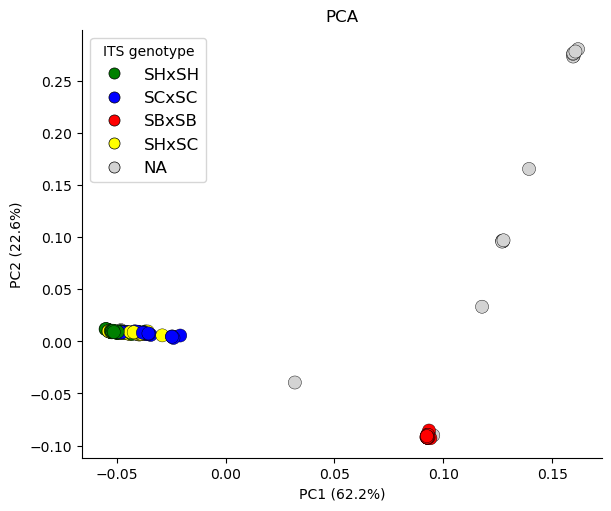

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


# ---------- config ----------
eigenvec_file = "pca.eigenvec"
eigenval_file = "pca.eigenval"
raw_out_file  = "pca.raw.csv"
src_out_file  = "pca.source_data.csv"
png_out_file  = "pca.png"
svg_out_file  = "pca.svg"

# color map by ITS genotype
color_map = {
    "SHxSH": "green",
    "SCxSC": "blue",
    "SBxSB": "red",
    "SHxSC": "yellow",
    "NA":    "lightgray",
}
default_color = "lightgray"

# function for zorder: bring shxsh below other points
def zorder_for_class(cls: str) -> int:
    return 1 if cls == "shxsh" else 3


# ---------- load pca ----------
# pca.eigenvec: typically "fid iid pc1 pc2 ...". read as whitespace-delimited.
pca_df = pd.read_csv(eigenvec_file, sep=r"\s+", header=None)

# name columns: first two are ids; then pc1..pcN
n_cols = pca_df.shape[1]
n_pcs = n_cols - 2
pc_names = [f"pc{i}" for i in range(1, n_pcs + 1)]
pca_df.columns = ["fid", "wgs_id"] + pc_names

# keep a copy of raw table
pca_df.to_csv(raw_out_file, index=False)

# ---------- join annotations ----------
pca_df = (
    pca_df
    .merge(info_df[["wgs_id", "species", "country", "locale"]], on="wgs_id", how="left")
    .merge(its_df[["wgs_id", "its_class"]], on="wgs_id", how="left")
)

# ---------- add aesthetics ----------
pca_df["color"] = pca_df["its_class"].map(color_map).fillna(default_color)
pca_df["zorder"] = pca_df["its_class"].apply(zorder_for_class)

# ---------- load eigenvalues ----------
val_df = pd.read_csv(eigenval_file, sep=r"\s+", header=None)
eigs = val_df.iloc[:, 0].to_numpy(dtype=float)

pc1_pct = (eigs[0] / eigs.sum() * 100) if eigs.size >= 1 else np.nan
pc2_pct = (eigs[1] / eigs.sum() * 100) if eigs.size >= 2 else np.nan

# ---------- plot ----------
fig, ax = plt.subplots(figsize=(6, 5), constrained_layout=True)

# draw in passes for zorder
for zval, sub in pca_df.groupby("zorder", sort=True):
    ax.scatter(
        sub["pc1"], sub["pc2"],
        c=sub["color"],
        edgecolor="black",
        linewidths=0.3,
        s=89,
        zorder=int(zval),
    )

# legend from color_map
handles = [
    mlines.Line2D(
        [], [], marker="o",
        color="white",
        markeredgecolor="black",
        markerfacecolor=color_map[k],
        markersize=8,
        markeredgewidth=0.5,
        linestyle="None",
        label=k
    )
    for k in color_map.keys()
]
ax.legend(title="ITS genotype", handles=handles, prop={"size": 12})

ax.set_xlabel(f"PC1 ({pc1_pct:.1f}%)" if np.isfinite(pc1_pct) else "PC1")
ax.set_ylabel(f"PC2 ({pc2_pct:.1f}%)" if np.isfinite(pc2_pct) else "PC2")
ax.set_title("PCA")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# ---------- save ----------
# plt.savefig(png_out_file, dpi=600, facecolor="white")
# plt.savefig(svg_out_file, facecolor="white")

# ---------- export source data ----------
pca_df[["wgs_id", "pc1", "pc2", "species", "its_class", "color", "zorder"]].to_csv(src_out_file, index=False)


plt.show()


In [9]:
pca_df

,fid,wgs_id,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,pc15,pc16,pc17,pc18,pc19,pc20,species,its_class,color,zorder
0,ERR3012900,ERR3012900,0.127035,0.096575,-0.007914,-0.008089,0.002074,0.001486,-0.007485,0.001296,...,0.015783,-0.019479,-0.020299,0.007567,-0.119611,-0.004627,sbxsc,NA,lightgray,3
1,ERR3012901,ERR3012901,0.127335,0.095973,-0.008921,-0.008169,0.000972,0.002832,-0.005712,-0.001796,...,0.007286,-0.019631,-0.015529,0.003117,-0.096726,0.002388,sbxsc,NA,lightgray,3
2,ERR3012902,ERR3012902,0.159793,0.273780,-0.009177,-0.001562,0.001705,0.002788,-0.001865,0.002726,...,-0.005984,0.008526,0.011544,-0.004839,0.042547,-0.001146,scurassoni,NA,lightgray,3
3,ERR3012903,ERR3012903,0.127318,0.096197,-0.009191,-0.008209,0.002268,0.003252,-0.005400,0.000283,...,0.014265,-0.017453,-0.019601,0.008702,-0.111107,-0.000556,sbxsc,NA,lightgray,3
4,ERR3012904,ERR3012904,0.127315,0.096283,-0.008683,-0.006868,0.001194,0.001075,-0.005933,0.001070,...,0.011825,-0.021991,-0.019456,0.011000,-0.115009,-0.002895,sbxsc,NA,lightgray,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,c_Sh_NG_os_2_2,c_Sh_NG_os_2_2,-0.051976,0.009795,-0.048381,-0.017170,-0.000054,-0.008614,-0.072020,-0.016512,...,-0.013608,-0.000706,-0.004528,-0.008224,0.010048,-0.045300,shaematobium,SHxSH,green,3
196,c_Sh_NG_os_3_11,c_Sh_NG_os_3_11,-0.049502,0.009141,-0.050689,-0.015017,0.027602,0.014697,-0.054453,-0.052379,...,0.106235,-0.019379,-0.031315,-0.061029,0.018465,0.067351,shaematobium,SHxSH,green,3
197,c_Sh_NG_os_3_3,c_Sh_NG_os_3_3,-0.052228,0.009775,-0.068520,-0.024779,-0.006986,0.024916,-0.087718,-0.004124,...,0.029969,-0.024676,0.008492,-0.065579,0.004691,-0.019109,shaematobium,SHxSH,green,3
198,c_Sh_NG_os_3_5,c_Sh_NG_os_3_5,-0.051540,0.010212,-0.059751,-0.019483,-0.007017,0.005133,-0.059528,-0.017235,...,0.028475,-0.013352,0.010599,-0.007579,-0.004025,-0.020584,shaematobium,SHxSH,green,3


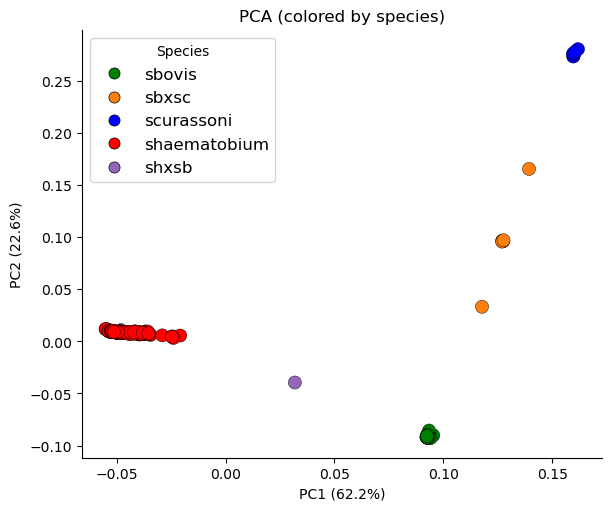

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# ---------- config ----------
eigenvec_file = "pca.eigenvec"
eigenval_file = "pca.eigenval"
raw_out_file  = "pca.raw.csv"
src_out_file  = "pca.source_data.csv"
png_out_file  = "pca.png"
svg_out_file  = "pca.svg"

# optional base palette for known species; others get auto-assigned below
base_species_colors = {
    "shaematobium": "red",
    "scurassoni":   "blue",
    "sbovis":       "green",
    "hybrid":       "purple",
}
default_color = "lightgray"

# (kept for completeness, but no longer used for color)
def zorder_for_class(cls: str) -> int:
    return 1 if str(cls).lower() == "shxsh" else 3

# ---------- load pca ----------
# pca.eigenvec: "fid iid pc1 pc2 ..." (whitespace-delimited)
pca_df = pd.read_csv(eigenvec_file, sep=r"\s+", header=None)

# name columns: first two are ids; then pc1..pcN
n_cols = pca_df.shape[1]
n_pcs = n_cols - 2
pc_names = [f"pc{i}" for i in range(1, n_pcs + 1)]
pca_df.columns = ["fid", "wgs_id"] + pc_names

# keep a copy of raw table
pca_df.to_csv(raw_out_file, index=False)

# ---------- join annotations ----------
# Assumes you have info_df (with wgs_id, species) and its_df (wgs_id, its_class) in memory
pca_df = (
    pca_df
    .merge(info_df[["wgs_id", "species"]], on="wgs_id", how="left")
    .merge(its_df[["wgs_id", "its_class"]], on="wgs_id", how="left")
)

# normalize species labels a bit
pca_df["species"] = pca_df["species"].astype(str).str.strip().str.lower()

# ---------- color by species ----------
# build a color map that covers all species present
present_species = sorted(pca_df["species"].fillna("unknown").unique())
species_color_map = base_species_colors.copy()

# assign colors to any species not in the base map
palette_cycle = [
    "tab:orange", "tab:purple", "tab:brown", "tab:pink",
    "tab:olive", "tab:cyan", "darkgoldenrod", "teal",
    "magenta", "saddlebrown", "navy"
]
unused_colors = iter(palette_cycle)
for sp in present_species:
    if sp not in species_color_map:
        try:
            species_color_map[sp] = next(unused_colors)
        except StopIteration:
            species_color_map[sp] = default_color

# assign colors and zorder
pca_df["color"]  = pca_df["species"].map(species_color_map).fillna(default_color)
pca_df["zorder"] = 2  # uniform; adjust per-species if desired

# ---------- load eigenvalues ----------
val_df = pd.read_csv(eigenval_file, sep=r"\s+", header=None)
eigs = val_df.iloc[:, 0].to_numpy(dtype=float)

pc1_pct = (eigs[0] / eigs.sum() * 100) if eigs.size >= 1 and eigs.sum() > 0 else np.nan
pc2_pct = (eigs[1] / eigs.sum() * 100) if eigs.size >= 2 and eigs.sum() > 0 else np.nan

# ---------- plot (PC1 vs PC2) ----------
fig, ax = plt.subplots(figsize=(6, 5), constrained_layout=True)

# draw in passes for zorder (kept for consistency)
for zval, sub in pca_df.groupby("zorder", sort=True):
    ax.scatter(
        sub["pc1"], sub["pc2"],
        c=sub["color"],
        edgecolor="black",
        linewidths=0.3,
        s=89,
        zorder=int(zval),
    )

# legend from species_color_map (only for species present)
handles = [
    mlines.Line2D(
        [], [], marker="o",
        color="white",
        markeredgecolor="black",
        markerfacecolor=species_color_map[sp],
        markersize=8,
        markeredgewidth=0.5,
        linestyle="None",
        label=sp
    )
    for sp in present_species
]
ax.legend(title="Species", handles=handles, prop={"size": 12})

ax.set_xlabel(f"PC1 ({pc1_pct:.1f}%)" if np.isfinite(pc1_pct) else "PC1")
ax.set_ylabel(f"PC2 ({pc2_pct:.1f}%)" if np.isfinite(pc2_pct) else "PC2")
ax.set_title("PCA (colored by species)")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# ---------- save ----------
# plt.savefig(png_out_file, dpi=600, facecolor="white")
# plt.savefig(svg_out_file, facecolor="white")

# ---------- export source data ----------
pca_df[["wgs_id", "pc1", "pc2", "species", "its_class", "color", "zorder"]].to_csv(src_out_file, index=False)

plt.show()




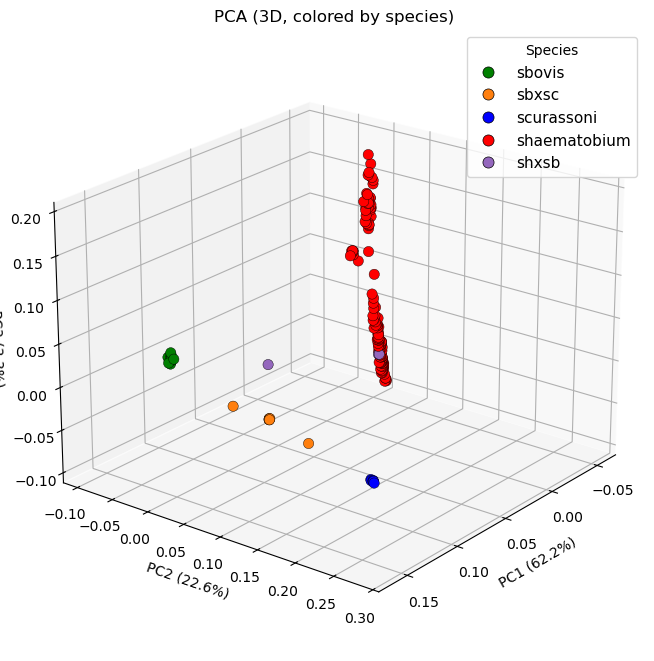

In [14]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
import matplotlib.lines as mlines
import numpy as np
import matplotlib.pyplot as plt

# --- guards ---
for col in ["pc1", "pc2", "pc3", "species"]:
    if col not in pca_df.columns:
        raise ValueError(f"Required column '{col}' not found in pca_df.")

# --- % variance for axis labels (uses eigs you already loaded) ---
def _pct(i, eigs):
    if isinstance(eigs, np.ndarray) and eigs.size > i and eigs.sum() > 0:
        return eigs[i] / eigs.sum() * 100.0
    return np.nan

pc1_pct = _pct(0, eigs)
pc2_pct = _pct(1, eigs)
pc3_pct = _pct(2, eigs)

# --- species → color map (reuse if already defined; otherwise build one) ---
try:
    species_color_map  # type: ignore
except NameError:
    base_species_colors = {
        "shaematobium": "red",
        "scurassoni":   "blue",
        "sbovis":       "green",
        "hybrid":       "purple",
    }
    species_color_map = base_species_colors

default_color = "lightgray"

# normalize species labels & build colors for any new categories
pca_df["species"] = pca_df["species"].astype(str).str.strip().str.lower()
present_species = sorted(pca_df["species"].fillna("unknown").unique())

palette_cycle = iter([
    "tab:orange", "tab:purple", "tab:brown", "tab:pink",
    "tab:olive", "tab:cyan", "darkgoldenrod", "teal",
    "magenta", "saddlebrown", "navy"
])
for sp in present_species:
    if sp not in species_color_map:
        try:
            species_color_map[sp] = next(palette_cycle)
        except StopIteration:
            species_color_map[sp] = default_color

# assign colors (reuse existing pca_df['color'] if already set & consistent)
if "color" not in pca_df.columns or set(pca_df["species"].unique()) - set(species_color_map.keys()):
    pca_df["color"] = pca_df["species"].map(species_color_map).fillna(default_color)

# --- plot 3D ---
fig = plt.figure(figsize=(7.5, 6.5), constrained_layout=True)
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    pca_df["pc1"], pca_df["pc2"], pca_df["pc3"],
    c=pca_df["color"],
    edgecolor="black",
    linewidths=0.3,
    s=55,
    depthshade=False,   # keeps flat, publication-like colors
)

# legend (species actually present)
handles = [
    mlines.Line2D(
        [], [], marker="o",
        color="white",
        markeredgecolor="black",
        markerfacecolor=species_color_map[sp],
        markersize=8,
        markeredgewidth=0.5,
        linestyle="None",
        label=sp
    )
    for sp in present_species
]
ax.legend(title="Species", handles=handles, prop={"size": 11}, loc="upper right")

# labels & styling
ax.set_xlabel(f"PC1 ({pc1_pct:.1f}%)" if np.isfinite(pc1_pct) else "PC1")
ax.set_ylabel(f"PC2 ({pc2_pct:.1f}%)" if np.isfinite(pc2_pct) else "PC2")
ax.set_zlabel(f"PC3 ({pc3_pct:.1f}%)" if np.isfinite(pc3_pct) else "PC3")
ax.set_title("PCA (3D, colored by species)")

ax.xaxis.pane.set_edgecolor("white")
ax.yaxis.pane.set_edgecolor("white")
ax.zaxis.pane.set_edgecolor("white")
ax.grid(True, linewidth=0.3)
ax.view_init(elev=22, azim=38)  # tweak as needed

# --- save (optional) ---
# plt.savefig("pca_3d_species.png", dpi=600, facecolor="white")
# plt.savefig("pca_3d_species.svg", facecolor="white")

plt.show()


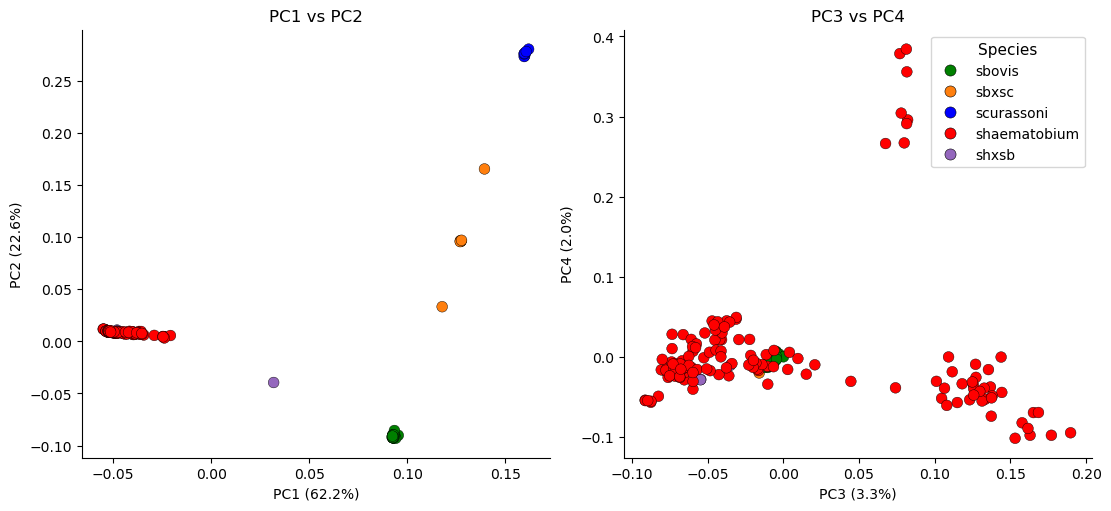

In [15]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

# --- check required PCs ---
required_pcs = ["pc1", "pc2", "pc3", "pc4"]
missing = [pc for pc in required_pcs if pc not in pca_df.columns]
if missing:
    raise ValueError(f"Your PCA does not contain required PCs: {missing}")

# --- % variance labels ---
def _pct(i, eigs):
    if isinstance(eigs, np.ndarray) and eigs.size > i and eigs.sum() > 0:
        return eigs[i] / eigs.sum() * 100.0
    return np.nan

pc1_pct = _pct(0, eigs)
pc2_pct = _pct(1, eigs)
pc3_pct = _pct(2, eigs)
pc4_pct = _pct(3, eigs)

# --- species color map (re-use existing or create) ---
try:
    species_color_map
except NameError:
    species_color_map = {
        "shaematobium": "red",
        "scurassoni":   "blue",
        "sbovis":       "green",
        "hybrid":       "purple",
    }

default_color = "lightgray"

# Normalize species labels
pca_df["species"] = pca_df["species"].astype(str).str.strip().str.lower()
present_species = sorted(pca_df["species"].fillna("unknown").unique())

# Add colors for *any* unexpected species
palette_cycle = iter([
    "tab:orange", "tab:purple", "tab:brown", "tab:pink",
    "tab:olive", "tab:cyan", "magenta", "teal", "navy"
])
for sp in present_species:
    if sp not in species_color_map:
        species_color_map[sp] = next(palette_cycle, default_color)

pca_df["color_species"] = pca_df["species"].map(species_color_map).fillna(default_color)

# --- plot ---
fig, axes = plt.subplots(1, 2, figsize=(11, 5), constrained_layout=True)

# Panel 1: PC1 vs PC2
ax = axes[0]
ax.scatter(
    pca_df["pc1"], pca_df["pc2"],
    c=pca_df["color_species"],
    edgecolor="black", linewidths=0.3, s=60
)
ax.set_xlabel(f"PC1 ({pc1_pct:.1f}%)" if np.isfinite(pc1_pct) else "PC1")
ax.set_ylabel(f"PC2 ({pc2_pct:.1f}%)" if np.isfinite(pc2_pct) else "PC2")
ax.set_title("PC1 vs PC2")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Panel 2: PC3 vs PC4
ax = axes[1]
ax.scatter(
    pca_df["pc3"], pca_df["pc4"],
    c=pca_df["color_species"],
    edgecolor="black", linewidths=0.3, s=60
)
ax.set_xlabel(f"PC3 ({pc3_pct:.1f}%)" if np.isfinite(pc3_pct) else "PC3")
ax.set_ylabel(f"PC4 ({pc4_pct:.1f}%)" if np.isfinite(pc4_pct) else "PC4")
ax.set_title("PC3 vs PC4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Legend
handles = [
    mlines.Line2D([], [], marker="o", linestyle="None",
                  markerfacecolor=species_color_map[sp],
                  markeredgecolor="black", markeredgewidth=0.4,
                  markersize=8, label=sp)
    for sp in present_species
]
axes[1].legend(title="Species", handles=handles, fontsize=10, title_fontsize=11, loc="best")

# --- save optional ---
# fig.savefig("pca_2panel_species.png", dpi=600, facecolor="white")
# fig.savefig("pca_2panel_species.svg", facecolor="white")

plt.show()


/tmp/ipykernel_358034/2359357215.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sh_df["locale"].replace({"": np.nan, "nan": np.nan}, inplace=True)


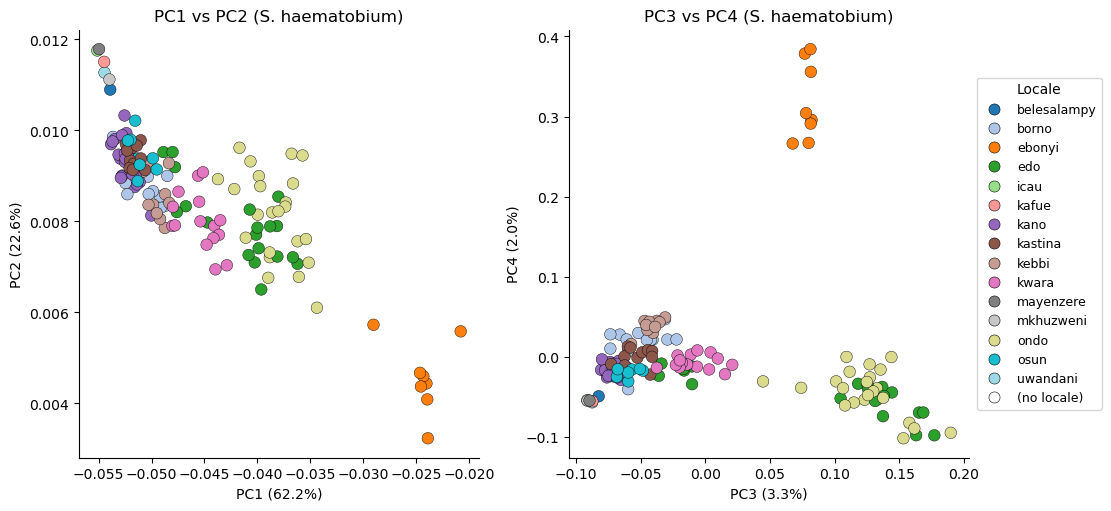

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# --- guards ---
for col in ["pc1", "pc2", "pc3", "pc4", "species", "locale"]:
    if col not in pca_df.columns:
        raise ValueError(f"Required column '{col}' not found in pca_df.")

# subset to S. haematobium
sh_df = pca_df.loc[pca_df["species"].astype(str).str.lower() == "shaematobium"].copy()

# normalize locale and mark missing
sh_df["locale"] = sh_df["locale"].astype(str).str.strip().str.lower()
sh_df["locale"].replace({"": np.nan, "nan": np.nan}, inplace=True)

# build locale -> color map
unique_locales = sorted(sh_df["locale"].dropna().unique())
color_cycle = plt.cm.tab20(np.linspace(0, 1, max(len(unique_locales), 1)))
locale_color_map = {loc: color_cycle[i % len(color_cycle)] for i, loc in enumerate(unique_locales)}
missing_locale_color = "white"

sh_df["color_locale"] = sh_df["locale"].map(locale_color_map).fillna(missing_locale_color)

# % variance labels
def _pct(i, eigs_arr):
    return (eigs_arr[i] / eigs_arr.sum() * 100.0) if isinstance(eigs_arr, np.ndarray) and eigs_arr.size > i and eigs_arr.sum() > 0 else np.nan
pc1_pct = _pct(0, eigs)
pc2_pct = _pct(1, eigs)
pc3_pct = _pct(2, eigs)
pc4_pct = _pct(3, eigs)

# --- plot: two panels ---
fig, axes = plt.subplots(1, 2, figsize=(11, 5), constrained_layout=True)

# Panel A: PC1 vs PC2
ax = axes[0]
ax.scatter(
    sh_df["pc1"], sh_df["pc2"],
    c=sh_df["color_locale"],
    edgecolor="black", linewidths=0.3, s=70
)
ax.set_xlabel(f"PC1 ({pc1_pct:.1f}%)" if np.isfinite(pc1_pct) else "PC1")
ax.set_ylabel(f"PC2 ({pc2_pct:.1f}%)" if np.isfinite(pc2_pct) else "PC2")
ax.set_title("PC1 vs PC2 (S. haematobium)")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Panel B: PC3 vs PC4
ax = axes[1]
ax.scatter(
    sh_df["pc3"], sh_df["pc4"],
    c=sh_df["color_locale"],
    edgecolor="black", linewidths=0.3, s=70
)
ax.set_xlabel(f"PC3 ({pc3_pct:.1f}%)" if np.isfinite(pc3_pct) else "PC3")
ax.set_ylabel(f"PC4 ({pc4_pct:.1f}%)" if np.isfinite(pc4_pct) else "PC4")
ax.set_title("PC3 vs PC4 (S. haematobium)")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Legend (locales present)
handles = [
    mlines.Line2D([], [], marker="o", linestyle="None",
                  markerfacecolor=locale_color_map[loc],
                  markeredgecolor="black", markeredgewidth=0.4,
                  markersize=8, label=loc)
    for loc in unique_locales
]
# entry for missing locale
handles.append(
    mlines.Line2D([], [], marker="o", linestyle="None",
                  markerfacecolor=missing_locale_color,
                  markeredgecolor="black", markeredgewidth=0.4,
                  markersize=8, label="(no locale)")
)

# put legend outside the right panel (adjust bbox if needed)
axes[1].legend(title="Locale", handles=handles, fontsize=9, title_fontsize=10,
               loc="center left", bbox_to_anchor=(1.02, 0.5), borderaxespad=0.0)

plt.show()
